# Processamento de linguagem natual

## importação de bibliotecas

In [3]:
import bs4 as bs # fazer leitura e processamento de dados na web
import urllib.request # Fazer requisição na internet
# processamento de linguagem natural
import nltk
import spacy

In [4]:
!python3 -m spacy download pt # baixar pacote em pt

2023-06-21 11:40:47.645564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 59.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


## Marcação de POS




```
atribui para as palavras partes de fala, como substantivos, adjetivos, vverbos, ...

analisar o que o texto contem

importante para deteccção de entidades no texto


```



In [7]:
pln = spacy.load("pt_core_news_sm")
pln

In [10]:
documento = pln('Estou aprendendo processamento de linguagem natual, curso na udemy.')
type(documento)

spacy.tokens.doc.Doc

In [11]:
for token in documento: # tokens sao as palavras ou virgula, ponto, ..
  print(token.text, token.pos_) # Vai mostrar cada palavra/virgula e o que ela representa

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natual ADJ
, PUNCT
curso NOUN
na ADP
udemy NOUN
. PUNCT


## Lematização e stemização

In [13]:
for token in documento:
  print(token.text, token.lemma_) # é como se estivesse trabalhando com o radical da palavra, serve para diminuir a dimensionalidade

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natual natual
, ,
curso curso
na em o
udemy udemy
. .


In [16]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando cursando cursei')
[token.lemma_ for token in doc] # TOdas as palavras viram a mesma, é como se estivessimos simplificando de certa forma

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursei']

In [17]:
import nltk
nltk.download('rslp') # stemização

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [18]:
stemmer = nltk.stem.RSLPStemmer() # Pega uma parte da palavra
stemmer.stem('aprender')

'aprend'

In [19]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natual natual nat
, , ,
curso curso curs
na em o na
udemy udemy udemy
. . .


Geralmente se usa mais lemmalização

## Carregamento dos textos

In [27]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [28]:
dados = dados.read()
dados # Pega a codigo fonte da pagina html

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(f

In [30]:
dados_html = bs.BeautifulSoup(dados, 'lxml') # traz todas as tags html, um,a leitura completa do arquivo
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.m

In [31]:
# Precisamos achar os textos, que ficam entre tas <p></p>

paragrafos = dados_html.find_all('p')
len(paragrafos) # Numero de paragrafos existentes

109

In [34]:
paragrafos[24].text

'A inteligência artificial começou como um campo experimental nos anos 50 com pioneiros como Allen Newell e Herbert Simon, que fundaram o primeiro laboratório de inteligência artificial na Universidade Carnegie Mellon, e McCarty que juntamente com Marvin Minsky, que fundaram o MIT AI Lab em 1959. Foram eles alguns dos participantes na famosa conferência de verão de 1956 em Darthmouth College.[22]\n'

In [38]:
# Vamos concatenar todos os paragrafos em apenas uma string
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [39]:
conteudo

'Na tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\nO desenvolvimento da área de estudo começou logo após a Segunda Guer

In [40]:
# Em processamento de linguagem natual é comum trabalharmos com letras minuscular
conteudo = conteudo.lower()

## Buscas em textos com spaCy

In [41]:
pln = spacy.load("pt_core_news_sm")


In [42]:
string = 'turing'
token_pesquisa = pln(string)

In [47]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab) # vocab retorna todo o vocabulario da lingua em questao
matcher.add('SEARCH', None, token_pesquisa) # Para criar o mecanismo de busca, string pode ser qualquer uma

In [50]:
doc = pln(conteudo) # todos os dados da pagina
matches = matcher(doc)
len(matches)

12

In [52]:
matches # Retorna o  resultados, onde começa e onde acaba

[(8661325627334373315, 3351, 3352),
 (8661325627334373315, 3361, 3362),
 (8661325627334373315, 3517, 3518),
 (8661325627334373315, 3522, 3523),
 (8661325627334373315, 3528, 3529),
 (8661325627334373315, 3591, 3592),
 (8661325627334373315, 4244, 4245),
 (8661325627334373315, 5509, 5510),
 (8661325627334373315, 8960, 8961),
 (8661325627334373315, 9095, 9096),
 (8661325627334373315, 9190, 9191),
 (8661325627334373315, 9307, 9308)]

In [54]:
doc[3351:3352]

turing

In [56]:
doc[3351-5:3352+10] # podemos pegar os X caracteres anteriores ou posterioes, para analisar o contexto

uma contribuição prática de alan turing foi o que se chamou depois de teste de turing

In [64]:
from IPython.core.display import HTML
numero_palavras = 50 # Numero de palavras antes e depois
doc = pln(conteudo)
matches = matcher(doc)
texto = ''

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))

for i in matches:
  inicio = i[1] - numero_palavras # i[1] se refere ao inicio da palavra
  if inicio <0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>") # Posição de inicio calculada anteriormente ate a posição final + numero de palavras para frente
  texto += '<br><br/>'
display(HTML(f"""...{texto}..."""))


##Extração de entidades nomeadas

Podemos localizar entidades como pessoas, localização, empresas, numericos, ...

In [66]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

cotidiano).[3 LOC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing,[4 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
prolog MISC
google ORG
wikipédia MISC
john mccarthy PER
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
john searle PER
hubert dreyfus PER
searle P

In [69]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras e stop words

Maneira de visualizar os termos mais frequentes de documentos

In [75]:
# Tirando as stop words
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'embora', 'você', 'logo', 'oitavo', 'qual', 'se', 'somos', 'qualquer', 'põem', 'tentaram', 'fazer', 'daquela', 'fora', 'todo', 'vais', 'poder', 'quieta', 'até', 'dezasseis', 'vós', 'a', 'só', 'deve', 'estive', 'aos', 'apoio', 'aquelas', 'dentro', 'certeza', 'tente', 'tudo', 'aqui', 'usa', 'eu', 'estado', 'naquele', 'tiveram', 'das', 'nenhuma', 'for', 'nem', 'porque', 'tuas', 'vezes', 'bem', 'muito', 'todos', 'daquele', 'dezoito', 'lugar', 'talvez', 'sim', 'maiorias', 'vinda', 'para', 'desde', 'sou', 'te', 'vossos', 'comprida', 'foste', 'tenho', 'tem', 'o', 'após', 'sabe', 'mil', 'faço', 'iniciar', 'debaixo', 'quinto', 'tive', 'fazem', 'tua', 'desta', 'desse', 'momento', 'à', 'área', 'já', 'zero', 'outros', 'ou', 'minha', 'antes', 'des', 'vens', 'contudo', 'coisa', 'vossa', 'aquele', 'sete', 'acerca', 'que', 'em', 'estão', 'tão', 'seu', 'obrigado', 'cima', 'tempo', 'grandes', 'vai', 'novo', 'ela', 'tarde', 'tipo', 'seis', 'cujo', 'quatro', 'teu', 'doze', 'tais', 'meus', 'fostes', 'meio

In [76]:
len(STOP_WORDS)

416

In [80]:
pln.vocab['logo'].is_stop

True

In [84]:
doc = pln(conteudo)
lista_token = [] # Lista de todas as palavras
for token in doc:
  lista_token.append(token.text)

sem_stop = []
for palavra in lista_token:
  if not pln.vocab[palavra].is_stop:
    sem_stop.append(palavra)

In [86]:
len(lista_token)

10232

In [87]:
len(sem_stop)

5978

In [85]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [72]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap = color_map)

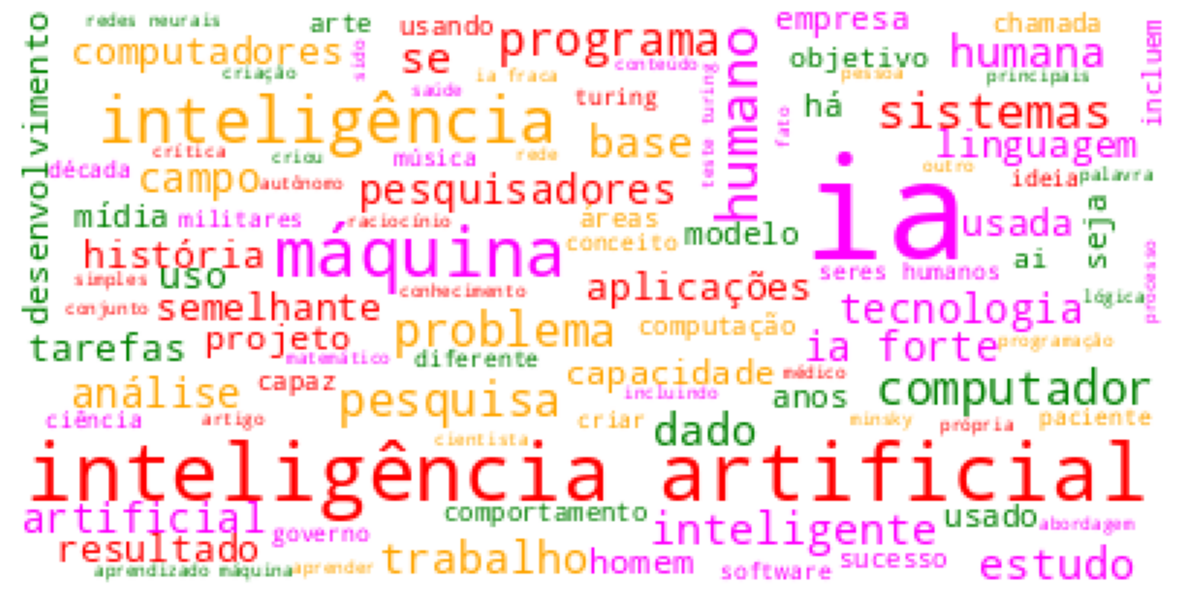

In [88]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop)) # Concatenamos nossa lista em uma string
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()